In [38]:
import pandas as pd

In [39]:
# import pandas as pd

# from pyxlsb import open_workbook as open_xlsb

# df = []

# with open_xlsb('challenge_data.xlsb') as wb:
#     with wb.get_sheet(1) as sheet:
#         for row in sheet.rows():
#             df.append([item.v for item in row])

# df = pd.DataFrame(df[1:], columns=df[0])

In [40]:
challenge = pd.read_csv("challenge_data.csv")
train = pd.read_csv("train.csv")

In [41]:
print(train.info())
print(train.describe())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903916 entries, 0 to 903915
Data columns (total 4 columns):
user_sequence         903916 non-null object
user_id               903916 non-null int64
challenge_sequence    903916 non-null int64
challenge             903916 non-null object
dtypes: int64(2), object(2)
memory usage: 27.6+ MB
None
             user_id  challenge_sequence
count  903916.000000       903916.000000
mean    59286.391043            7.000000
std     31538.564242            3.741659
min      4576.000000            1.000000
25%     31940.750000            4.000000
50%     59221.000000            7.000000
75%     86616.250000           10.000000
max    113839.000000           13.000000


,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933


In [42]:
challenge.rename(columns={"challenge_ID":"challenge"},inplace=True)
print(challenge.info())
print(challenge.describe())
challenge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge               5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5594 non-null object
total_submissions       5254 non-null float64
publish_date            5606 non-null object
author_ID               5567 non-null object
author_gender           5509 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB
None
       programming_language  total_submissions  category_id
count           5606.000000        5254.000000  3765.000000
mean               1.081877         348.362581    81.083665
std                0.316487        1044.810816    56.367797
min                1.000000           2.000000    22.000000
25%                1.000000          67.000000    36.000000
50%                1.000000         134.000000    66.000000

,challenge,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,CI23478,2,SI2445,37.0,06-05-2006,AI563576,M,AOI100001,NaN
1,CI23479,2,SI2435,48.0,17-10-2002,AI563577,M,AOI100002,32.0
2,CI23480,1,SI2435,15.0,16-10-2002,AI563578,M,AOI100003,NaN
3,CI23481,1,SI2710,236.0,19-09-2003,AI563579,M,AOI100004,70.0
4,CI23482,2,SI2440,137.0,21-03-2002,AI563580,M,AOI100005,NaN


In [43]:
# missing values
challenge.author_org_ID=challenge.author_org_ID.fillna("AOI100000")
challenge.category_id=challenge.category_id.fillna("999")

In [44]:
# train.head()

In [45]:
# train_merged = train.merge(challenge, on='challenge', how='left')

In [46]:
# train_merged.head()

The programming language and category columns were being read as numeric column whereas they were categories. So we converted them to string.


In [47]:
challenge["programming_language"] = challenge[["programming_language"]].astype(str)
challenge["category_id"] = challenge[["category_id"]].astype(str)

1    5217
2     319
3      70
Name: programming_language, dtype: int64


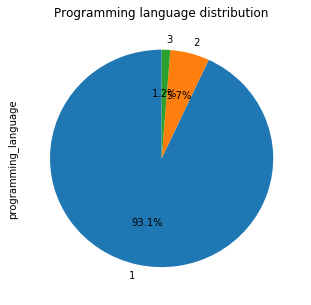

In [48]:
print(challenge.programming_language.value_counts())
challenge.programming_language.value_counts().plot.pie(figsize=(5,5),title="Programming language distribution",startangle=90, autopct='%.1f%%')

The above graph shows that "language 1" is the popular programe language choice for challenges.

M    4834
F     675
Name: author_gender, dtype: int64


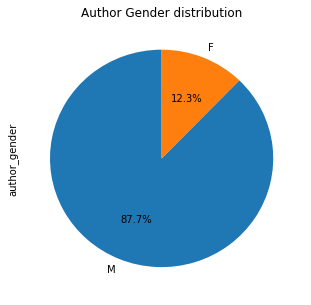

In [49]:
# ax = challenge.author_gender.value_counts()
print(challenge.author_gender.value_counts())
challenge.author_gender.value_counts().plot.pie(figsize=(5,5),title="Author Gender distribution",startangle=90, autopct='%.1f%%')

AOI100201    351
AOI100000    248
AOI100001    100
AOI100032     87
AOI101254     67
AOI100085     64
AOI100068     62
AOI100565     55
AOI100130     51
AOI100089     51
Name: author_org_ID, dtype: int64


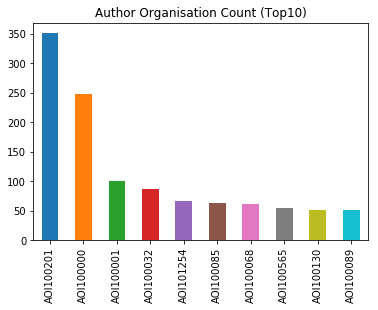

In [50]:
print(challenge.author_org_ID.value_counts().head(10))
challenge.author_org_ID.value_counts().head(10).plot.bar(title="Author Organisation Count (Top10)")

999      1841
29.0      412
39.0      208
69.0      170
122.0     170
36.0      102
28.0       99
70.0       98
23.0       73
46.0       73
Name: category_id, dtype: int64


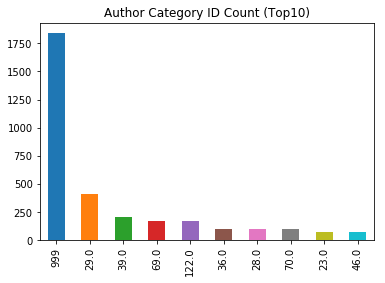

In [51]:
print(challenge.category_id.value_counts().head(10))
challenge.category_id.value_counts().head(10).plot.bar(title="Author Category ID Count (Top10)")

In [52]:
print(1841/5606)

0.3283981448448091


               total_submissions
author_gender                   
F                       238111.0
M                      1568686.0


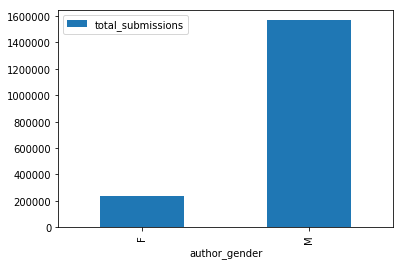

In [53]:
print(challenge.groupby(['author_gender']).sum())
challenge.groupby(['author_gender']).sum().plot.bar()

programming_language          1        2       3
author_gender                                   
F                      229160.0   8230.0   721.0
M                     1519021.0  41373.0  8292.0


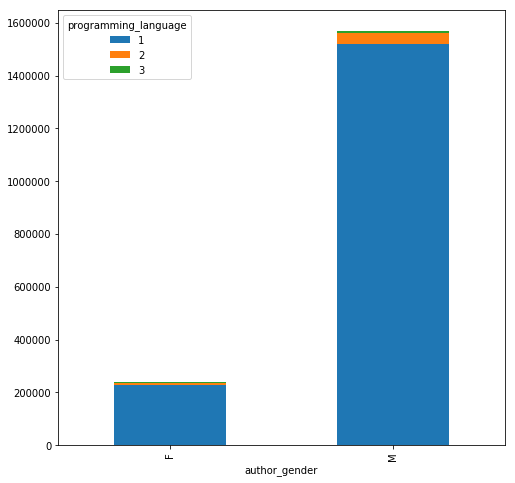

In [54]:
print(pd.crosstab(index=challenge.author_gender,columns=challenge.programming_language,aggfunc="sum",values=challenge.total_submissions))
pd.crosstab(index=challenge.author_gender,columns=challenge.programming_language,aggfunc="sum",values=challenge.total_submissions).plot.bar(stacked=True,figsize=(8,8))